<a href="https://colab.research.google.com/github/MatthewSebastian15/datacomp/blob/main/DataComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Data Preparation** 🧹

In [7]:
url = "https://raw.githubusercontent.com/MatthewSebastian15/datacomp/main/public-transport.csv"
df = pd.read_csv(url)

In [8]:
df.head(3)

transID         payCardID payCardBank     payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney  Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki    Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki   Emong Wastuti          F   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   

   direction tapInStops  ... tapInStopsLon  stopStartSeq            tapInTime  \
0        1.0     P00142  ...     106.84402             7  2023-04-03 05:21:44   
1        0.0    B01963P  ...     106.83302            13  2023-04-03 05:42:44   
2        0.0    B00499P  ...     106.81435            38  2023-04-03 05:59:06   

   tapOutStops        tapOutStopsName tapOutStopsLat tapOutStopsLon  \
0       P00253                Tegalan      -6.203101      106.85715   
1      B03307P    Sampoerna Strategic      -6.217152      106.81892   
2      B04962P  Simpang Kunir Kemukus      -6.133731      106.81475   

   stopEndSeq           tapOutTime  payAmount  
0        12.0  2023-04-03 06:00:53     3500.0  
1        21.0  2023-04-03 06:40:01     3500.0  
2        39.0  2023-04-03 06:50:55     3500.0  

[3 rows x 22 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [10]:
df.describe()

payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.790000e+04      37900.000000  37900.000000   37900.000000   
mean   4.250060e+17       1990.089314      0.500633      -6.214838   
std    1.321699e+18         13.051482      0.500006       0.057911   
min    6.040368e+10       1946.000000      0.000000      -6.394973   
25%    1.800442e+14       1982.000000      0.000000      -6.245863   
50%    3.507947e+15       1990.000000      1.000000      -6.214587   
75%    4.699023e+15       2001.000000      1.000000      -6.175528   
max    4.997694e+18       2012.000000      1.000000      -6.089429   

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count   37900.000000  37900.000000    36556.000000    36556.000000   
mean      106.841554     13.572480       -6.214651      106.841233   
std         0.060369     12.237623        0.059022        0.060999   
min       106.614730      0.000000       -6.394973      106.614730   
25%       106.803470      4.000000       -6.247225      106.801750   
50%       106.834830     10.000000       -6.214718      106.834580   
75%       106.882270     19.000000       -6.174736      106.883030   
max       107.023950     68.000000       -6.091746      107.023660   

         stopEndSeq     payAmount  
count  36556.000000  36893.000000  
mean      21.219909   2699.712683  
std       13.800689   4212.225592  
min        1.000000      0.000000  
25%       11.000000      0.000000  
50%       18.000000   3500.000000  
75%       29.000000   3500.000000  
max       77.000000  20000.000000

In [11]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

### CorridorID & CorridorName

In [44]:
corridor_map_id_to_name = df[['corridorID','corridorName']].dropna().drop_duplicates().set_index('corridorID')['corridorName'].to_dict()
corridor_map_name_to_id = {v:k for k,v in corridor_map_id_to_name.items()}
df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(corridor_map_id_to_name))
df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridor_map_name_to_id))
df = df.dropna(subset=['corridorID','corridorName'])

In [48]:
df[['corridorName','corridorID']].head(15)

corridorName corridorID
0                      Matraman Baru - Ancol          5
1   Stasiun Tebet - Karet via Patra Kuningan         6C
2                         Pantai Maju - Kota        R1A
3        Pulo Gebang - Pulo Gadung 2 via PIK        11D
4                      Tanjung Priok - Pluit         12
5                       Cibubur - Balai Kota         1T
8                    Bekasi Barat - Kuningan        B14
9                            Rempoa - Blok M         1Q
10   Kampung Melayu - Tanah Abang via Cikini         5M
11                              BKN - Blok M        M7B
12                          PGC 2 - Grogol 2         9A
13                    Pulo Gadung 2 - Tosari          4
14                  Pasar Minggu - Jagakarsa     JAK.46
15                Ciputat - Kampung Rambutan        S22
16                         Ciledug - Tendean         13

### tapInStops

In [49]:
stop_map_in = df[['tapInStops','tapInStopsName']].dropna().drop_duplicates().set_index('tapInStopsName')['tapInStops'].to_dict()
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(stop_map_in))
df = df.dropna(subset=['tapInStops'])

In [50]:
df[['tapInStops','tapInStopsName']].head(10)

tapInStops          tapInStopsName
0      P00142               Pal Putih
1     B01963P              Kemenkes 2
2     B00499P            Gg. Kunir II
3     B05587P            Taman Elok 1
4      P00239  Sunter Boulevard Barat
5     B00127P                Benhil 3
8     B00795P                Imperium
9     B05781P              TPU Bungur
10    B05433P        Pegangsaan Timur
11     P00254                 Tendean

### tapOutStops

In [51]:
stop_map_out = df[['tapOutStops','tapOutStopsName']].dropna().drop_duplicates().set_index('tapOutStopsName')['tapOutStops'].to_dict()
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(stop_map_out))
df['tapOutStops'] = df['tapOutStops'].fillna('Unknown')

In [52]:
df[['tapOutStops','tapOutStopsName']].head(10)

tapOutStops        tapOutStopsName
0       P00253                Tegalan
1      B03307P    Sampoerna Strategic
2      B04962P  Simpang Kunir Kemukus
3      B03090P      Raya Penggilingan
4       P00098       Kali Besar Barat
5      B00694P            Grand Sahid
8      B01853P           Kayuringin 2
9      B06578P         Blok M Jalur 3
10     B02387P             Matraman 4
11      P00129       Mampang Prapatan

### payAmount & fare_category

In [15]:
corridor_fare_map = df.groupby('corridorID')['payAmount'].median()
df['payAmount'] = df['payAmount'].fillna(df['corridorID'].map(corridor_fare_map))
df['payAmount'] = df['payAmount'].fillna(df['payAmount'].median())

df['fare_category'] = df['payAmount'].apply(
    lambda x: 'Free' if x == 0 else ('Normal' if x <= 3500 else 'Premium')
)

### Time and Duration Data

In [16]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

df['duration_minutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60
df = df[(df['duration_minutes'] > 0.5) & (df['duration_minutes'] < 240)]

### Time Features

day_of_week

0: Senin

1: Selasa

2: Rabu

3: Kamis

4: Jumat

5: Sabtu

6: Minggu

tapInHour

tapInTime : menggunakan format waktu 0 - 23

0 = jam 00.00–00.59 (tengah malam)

6 = jam 06.00–06.59 (pagi)

17 = jam 17.00–17.59 (sore / jam sibuk)

In [17]:
df['day_of_week'] = df['tapInTime'].dt.dayofweek
df['tapInHour'] = df['tapInTime'].dt.hour

In [18]:
df_Time = df[['tapInTime', 'day_of_week', 'tapInHour']]
df_Time

tapInTime  day_of_week  tapInHour
0     2023-04-03 05:21:44            0          5
1     2023-04-03 05:42:44            0          5
2     2023-04-03 05:59:06            0          5
3     2023-04-03 05:44:51            0          5
4     2023-04-03 06:17:35            0          6
...                   ...          ...        ...
37895 2023-04-21 18:18:37            4         18
37896 2023-04-18 21:52:31            1         21
37897 2023-04-04 10:29:47            1         10
37898 2023-04-15 19:59:26            5         19
37899 2023-04-12 21:08:12            2         21

[35445 rows x 3 columns]

### Distance Feature

distance_km : Jarak antara halte yang sudah di tempuh

In [19]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

df['distance_km'] = haversine(df['tapInStopsLat'], df['tapInStopsLon'],
                              df['tapOutStopsLat'], df['tapOutStopsLon'])

In [20]:
df_distance = df[['tapInStopsLat','tapInStopsLon','tapOutStopsLat','tapOutStopsLon','distance_km']]
df_distance

tapInStopsLat  tapInStopsLon  tapOutStopsLat  tapOutStopsLon  \
0          -6.184631      106.84402       -6.203101       106.85715   
1          -6.228700      106.83302       -6.217152       106.81892   
2          -6.133132      106.81435       -6.133731       106.81475   
3          -6.195743      106.93526       -6.183068       106.93194   
4          -6.149650      106.88900       -6.135355       106.81143   
...              ...            ...             ...             ...   
37895      -6.196892      106.82309       -6.290967       106.82365   
37896      -6.290154      106.88116       -6.291075       106.88634   
37897      -6.216247      106.81676       -6.370321       106.89628   
37898      -6.188656      106.80954       -6.188861       106.81135   
37899      -6.236466      106.74786       -6.238340       106.77752   

       distance_km  
0         2.514901  
1         2.019437  
2         0.079950  
3         1.456398  
4         8.721936  
...            ...  
37895    10.460846  
37896     0.581609  
37897    19.255109  
37898     0.201384  
37899     3.285133  

[35445 rows x 5 columns]

#### **Data Preparation** Pt.2 🧹

In [21]:
# Convert to DateTime
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

# Convert to Numeric
for col in ['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'stopStartSeq', 'stopEndSeq', 'payAmount']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Convert to Categoric
for col in ['payCardSex', 'payCardBank', 'corridorID']:
    df[col] = df[col].astype('category')

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df = df[(df['payCardBirthDate'] >= 1900) & (df['payCardBirthDate'] <= 2025)]

df['payAmount'] = df['payAmount'].clip(lower=0)

df = df[
    (df['tapInStopsLat'].between(-6.4, -6.0)) &
    (df['tapInStopsLon'].between(106.6, 107.0)) &
    (df['tapOutStopsLat'].between(-6.4, -6.0)) &
    (df['tapOutStopsLon'].between(106.6, 107.0))
]

df = df[(df['is_complete_trip']) & (df['stopEndSeq'] > df['stopStartSeq'])]

df = df[(df['duration_minutes'] >= 1) & (df['duration_minutes'] <= 180)]

df['avg_speed_kmph'] = df['distance_km'] / (df['duration_minutes'] / 60)
df = df[df['avg_speed_kmph'] <= 80]

df = df.drop_duplicates(subset=['transID'])

#### **Feature** Engineering 🧱

In [24]:
df['age'] = 2025 - df['payCardBirthDate']

df['duration_minutes'] = df.apply(
    lambda x: (x['tapOutTime'] - x['tapInTime']).total_seconds() / 60
    if x['is_complete_trip'] else np.nan, axis=1)

df['day_of_week'] = df['tapInTime'].dt.day_name()

df['tapInHour'] = df['tapInTime'].dt.hour

In [25]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df['distance_km'] = df.apply(
    lambda x: haversine(x['tapInStopsLat'], x['tapInStopsLon'], x['tapOutStopsLat'], x['tapOutStopsLon'])
    if x['is_complete_trip'] else np.nan, axis=1)

df['fare_category'] = pd.cut(df['payAmount'], bins=[-1, 0, 3500, float('inf')], labels=['Free', 'Standard', 'Premium'])

#### **Validation** 🏒

In [26]:
print(df.isnull().sum())

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
is_complete_trip    0
fare_category       0
duration_minutes    0
day_of_week         0
tapInHour           0
distance_km         0
avg_speed_kmph      0
age                 0
dtype: int64


In [27]:
df['duration_minutes'].tail()

37895     97.200000
37896     35.850000
37897    177.633333
37898     28.400000
37899     26.683333
Name: duration_minutes, dtype: float64

In [28]:
df = df[df['duration_minutes'].ge(0) | df['duration_minutes'].isnull()]

#### **EDA** (*Exploratory Data Analysis*)

In [29]:
sns.set(style='whitegrid')

a. Demographic Analysis

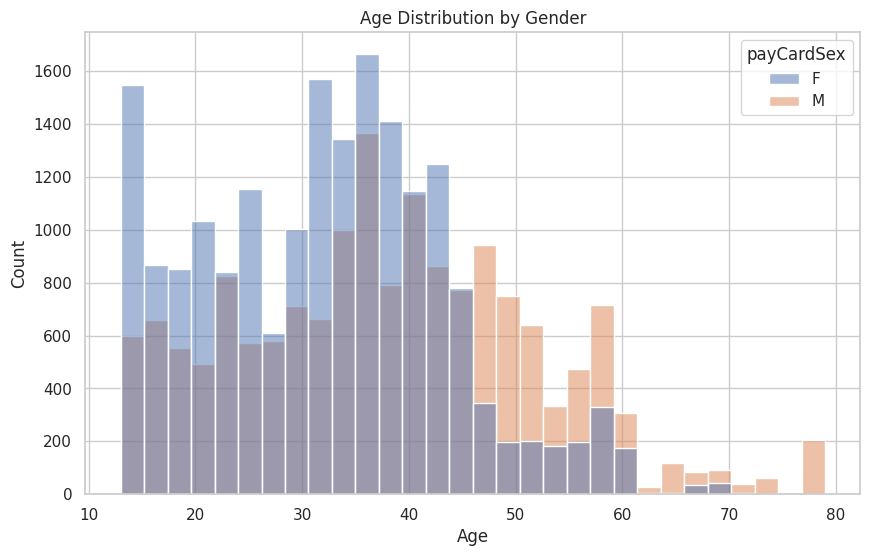

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='payCardSex', bins=30)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

b. Temporal Analysis (Identify Rush Hours)

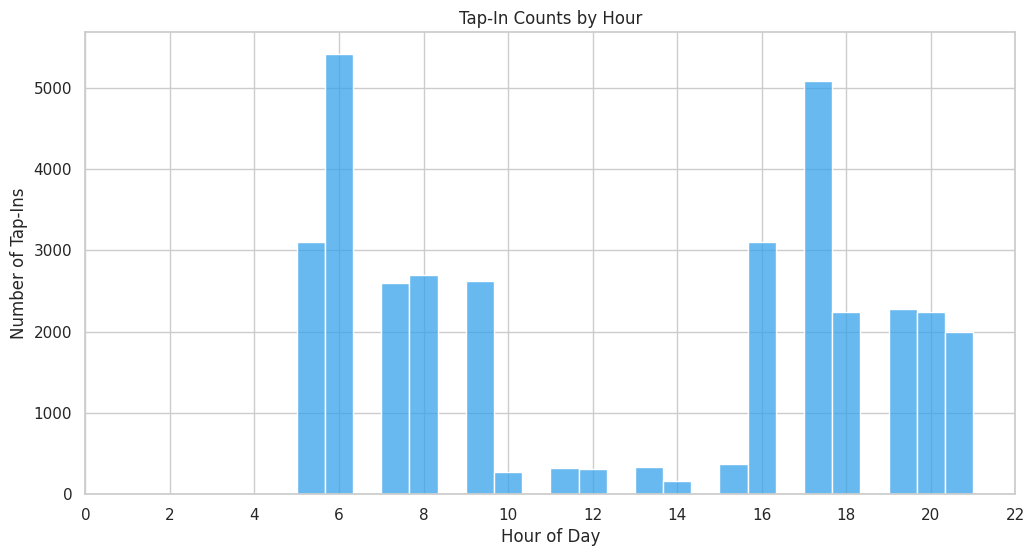

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tapInHour', bins=24, color='#36A2EB')
plt.title('Tap-In Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tap-Ins')
plt.xticks(ticks=range(0, 24, 2))
plt.show()

c. Route and Spatial Analysis

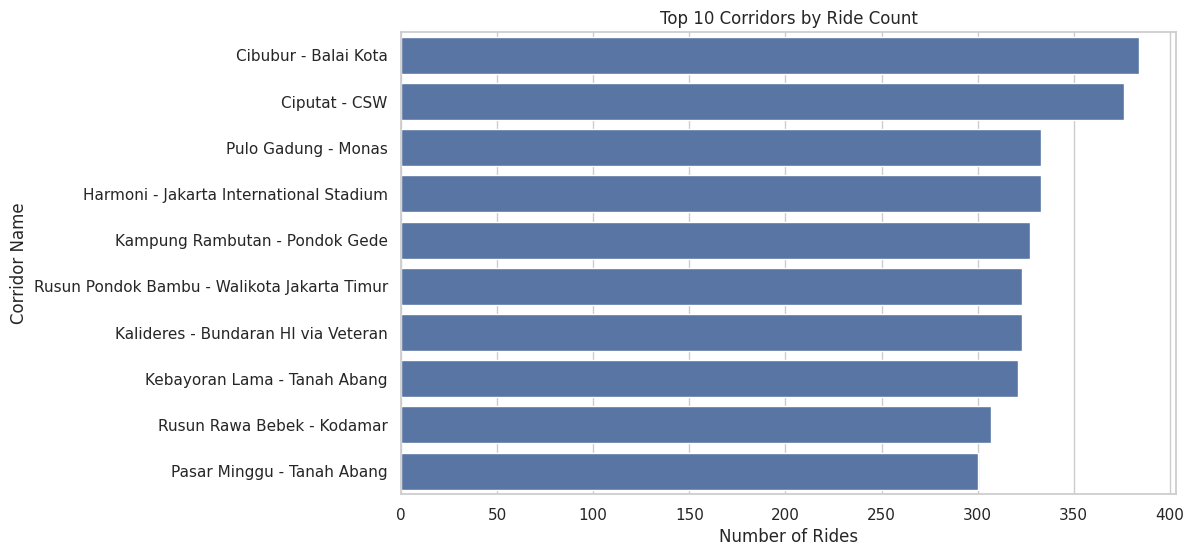

                                         transID  payAmount  duration_minutes
corridorName                                                                 
Cibubur - Balai Kota                         384    20000.0         72.214453
Ciputat - CSW                                376     3500.0         76.091090
Harmoni - Jakarta International Stadium      333     3500.0         71.931281
Pulo Gadung - Monas                          333     3500.0         71.594645
Kampung Rambutan - Pondok Gede               327        0.0         71.904434


In [32]:
top_corridors = df['corridorName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corridors.values, y=top_corridors.index)
plt.title('Top 10 Corridors by Ride Count')
plt.xlabel('Number of Rides')
plt.ylabel('Corridor Name')
plt.show()

summary = df[df['is_complete_trip']].groupby('corridorName').agg({
    'transID': 'count',
    'payAmount': 'mean',
    'duration_minutes': 'mean'
}).sort_values('transID', ascending=False).head(5)
print(summary)

d. Fare Analysis

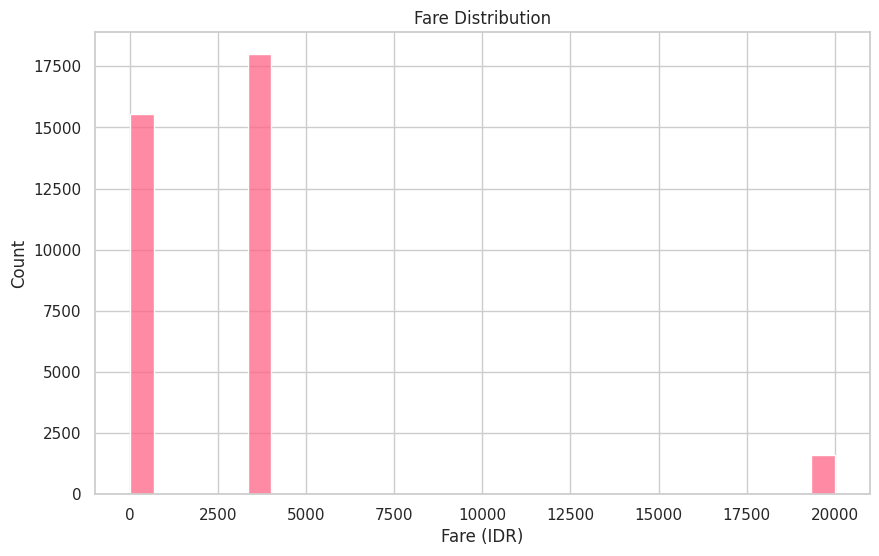

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='payAmount', bins=30, color='#FF6384')
plt.title('Fare Distribution')
plt.xlabel('Fare (IDR)')
plt.ylabel('Count')
plt.show()

e. General Map Analysis

In [34]:
import folium

# Aggregate tap-in counts by stop
stop_counts = df.groupby(['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']).size().reset_index(name='tap_in_count')

# Create a map centered on Jakarta
m = folium.Map(location=[-6.2, 106.8], zoom_start=12)

# Add markers for each stop, sized by tap-in count
for _, row in stop_counts.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=min(row['tap_in_count'] / 100, 20),  # Scale radius, cap at 20
        popup=f"{row['tapInStopsName']}: {row['tap_in_count']} tap-ins",
        fill=True,
        fill_color='blue',
        color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Save the map
# m.save('jakarta_tapin_map.html')

In [35]:
from IPython.display import display
display(m)

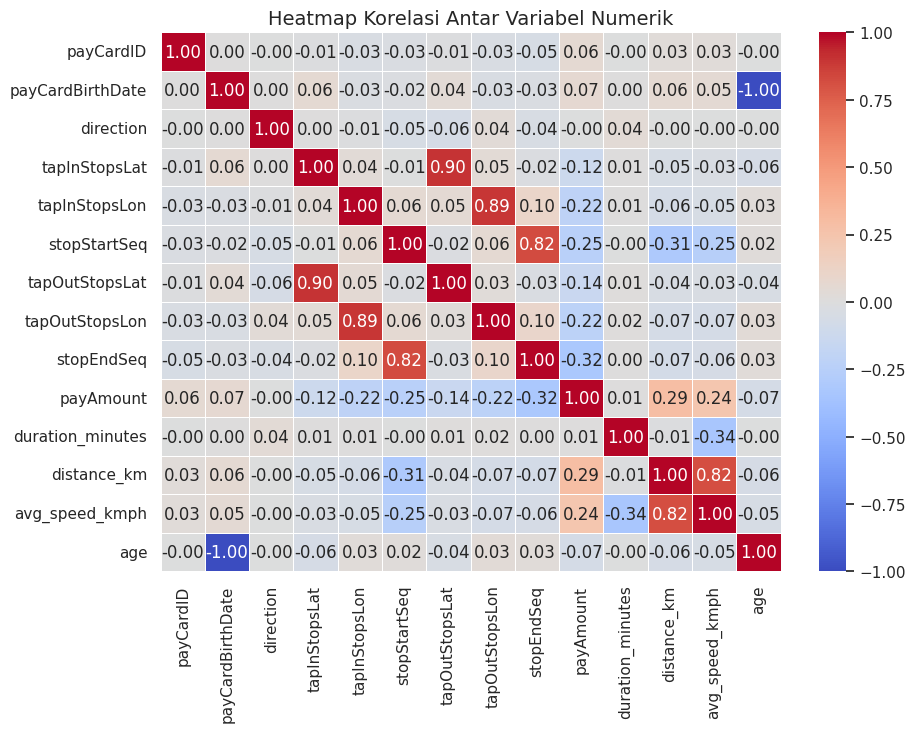

In [36]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

corr = df[num_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik", fontsize=14)
plt.show()

/tmp/ipython-input-1169705541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fare_category', y='duration_minutes', data=df, palette="Set2")


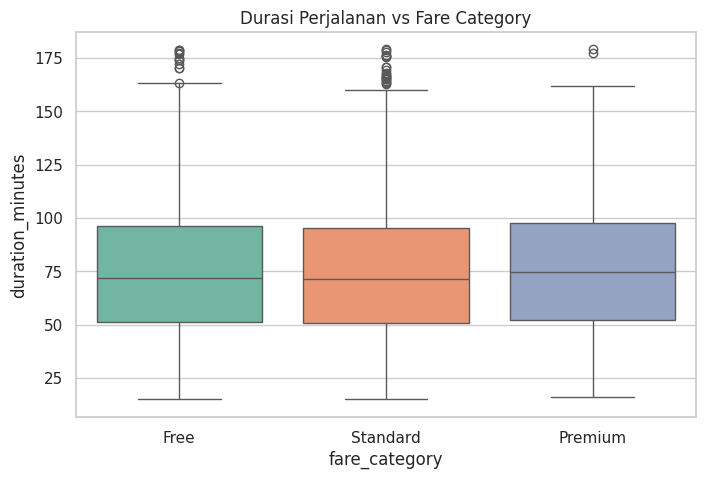

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fare_category', y='duration_minutes', data=df, palette="Set2")
plt.title("Durasi Perjalanan vs Fare Category")
plt.show()

/tmp/ipython-input-3940255936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='duration_minutes', data=df, palette="Set3")


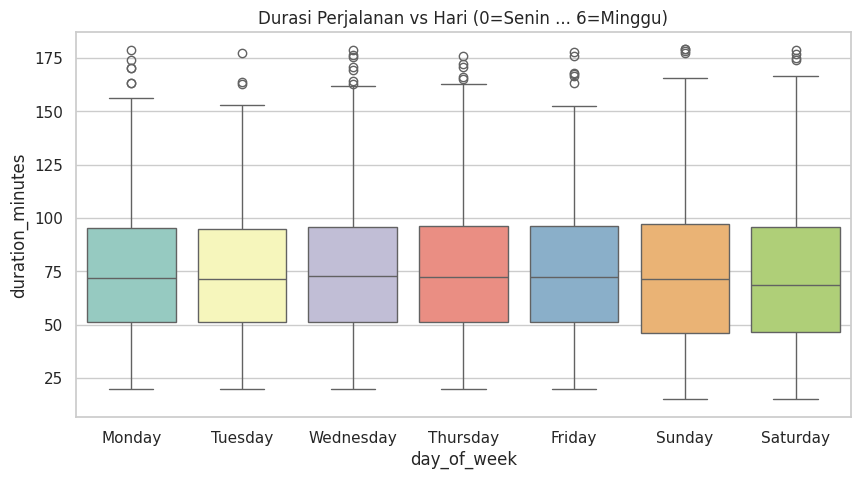

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='day_of_week', y='duration_minutes', data=df, palette="Set3")
plt.title("Durasi Perjalanan vs Hari (0=Senin ... 6=Minggu)")
plt.show()

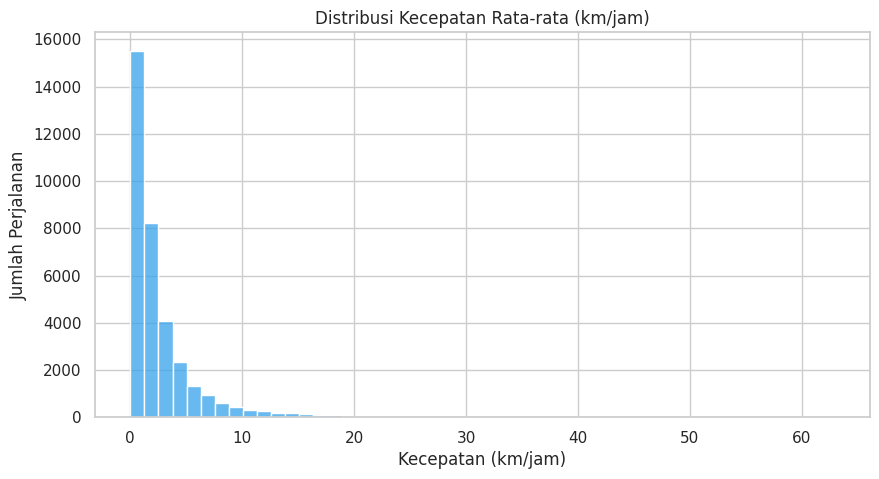

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df['avg_speed_kmph'], bins=50, color="#36A2EB")
plt.title("Distribusi Kecepatan Rata-rata (km/jam)")
plt.xlabel("Kecepatan (km/jam)")
plt.ylabel("Jumlah Perjalanan")
plt.show()

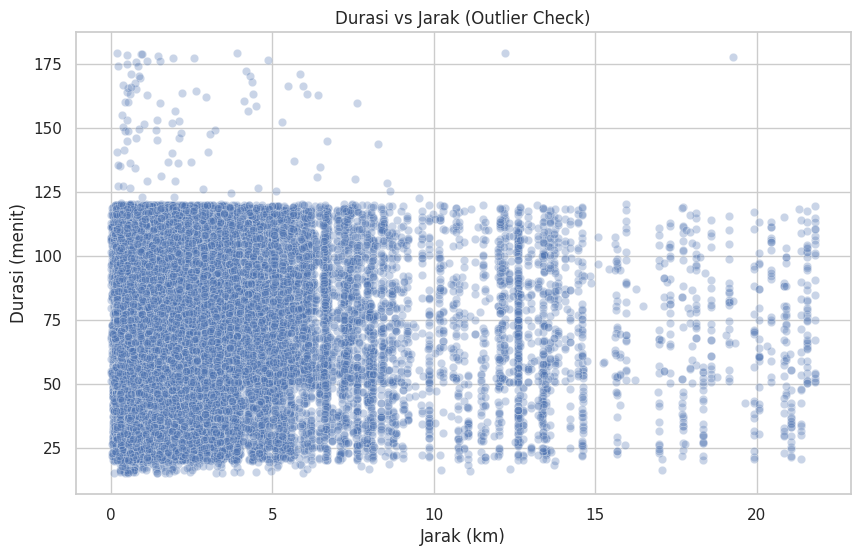

Jumlah outlier (jarak <2 km & durasi >60 menit): 12365


tapInStopsName                tapOutStopsName  distance_km  \
301          Sawo Kecik Raya                  Stasiun Tebet     0.366473   
303               Pool Taksi     Pajak Dan Retribusi Cakung     1.879310   
306            Jln. Sawo III  Masjid Al Barakah Assyafiiyah     0.843631   
307  Jln. Karang Tengah Raya     Jln. Pinang II Pondok Labu     1.724857   
310               JPO Blok E                         Blok F     0.502017   
315      Pusdiklat Kemenag 2             Pom Bensin Ciputat     1.225530   
317                Juraganan                   Ps. Palmerah     1.531362   
319                   SMA 40         Jln. R. E. Martadinata     0.803002   
320          Plaza Senayan 1                   Senayan City     0.337193   
322                   SMK 57                        Ragunan     1.708920   

     duration_minutes  
301         84.500000  
303         65.633333  
306         78.333333  
307        114.683333  
310         83.250000  
315         70.233333  
317         81.700000  
319         93.566667  
320         95.383333  
322        102.083333

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance_km', y='duration_minutes', data=df, alpha=0.3)
plt.title("Durasi vs Jarak (Outlier Check)")
plt.xlabel("Jarak (km)")
plt.ylabel("Durasi (menit)")
plt.show()

outliers = df[(df['distance_km'] < 2) & (df['duration_minutes'] > 60)]
print("Jumlah outlier (jarak <2 km & durasi >60 menit):", outliers.shape[0])
outliers[['tapInStopsName','tapOutStopsName','distance_km','duration_minutes']].head(10)

/tmp/ipython-input-2880041349.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_timecat.index, y=avg_timecat.values, palette="Set1")


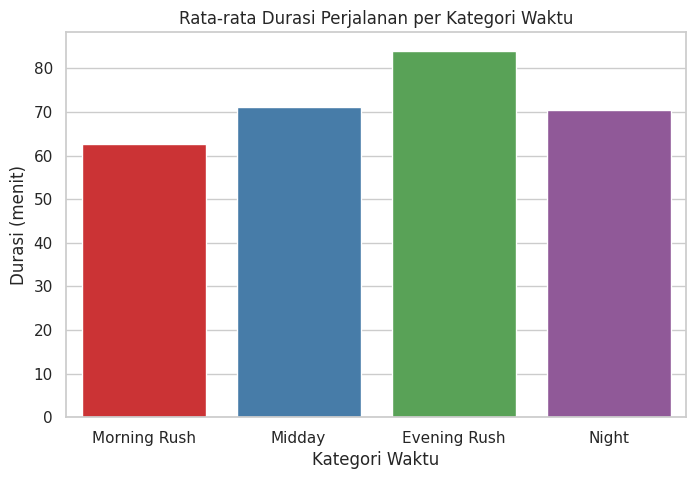

In [41]:
# Buat kategori waktu
def time_category(hour):
    if 6 <= hour < 9:
        return "Morning Rush"
    elif 16 <= hour < 19:
        return "Evening Rush"
    elif 9 <= hour < 16:
        return "Midday"
    else:
        return "Night"

df['time_category'] = df['tapInHour'].apply(time_category)

# Visualisasi rata-rata durasi per kategori waktu
avg_timecat = df.groupby('time_category')['duration_minutes'].mean().reindex(["Morning Rush","Midday","Evening Rush","Night"])
plt.figure(figsize=(8,5))
sns.barplot(x=avg_timecat.index, y=avg_timecat.values, palette="Set1")
plt.title("Rata-rata Durasi Perjalanan per Kategori Waktu")
plt.ylabel("Durasi (menit)")
plt.xlabel("Kategori Waktu")
plt.show()


/tmp/ipython-input-4028958341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tapin.values, y=top_tapin.index, palette="Blues_r")


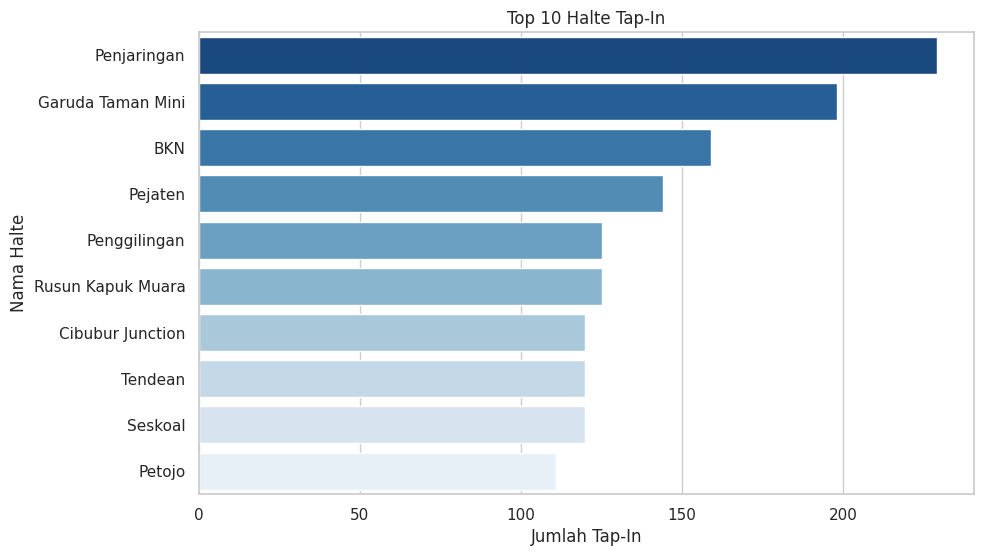

In [42]:
top_tapin = df['tapInStopsName'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_tapin.values, y=top_tapin.index, palette="Blues_r")
plt.title("Top 10 Halte Tap-In")
plt.xlabel("Jumlah Tap-In")
plt.ylabel("Nama Halte")
plt.show()

/tmp/ipython-input-2615062791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tapout.values, y=top_tapout.index, palette="Greens_r")


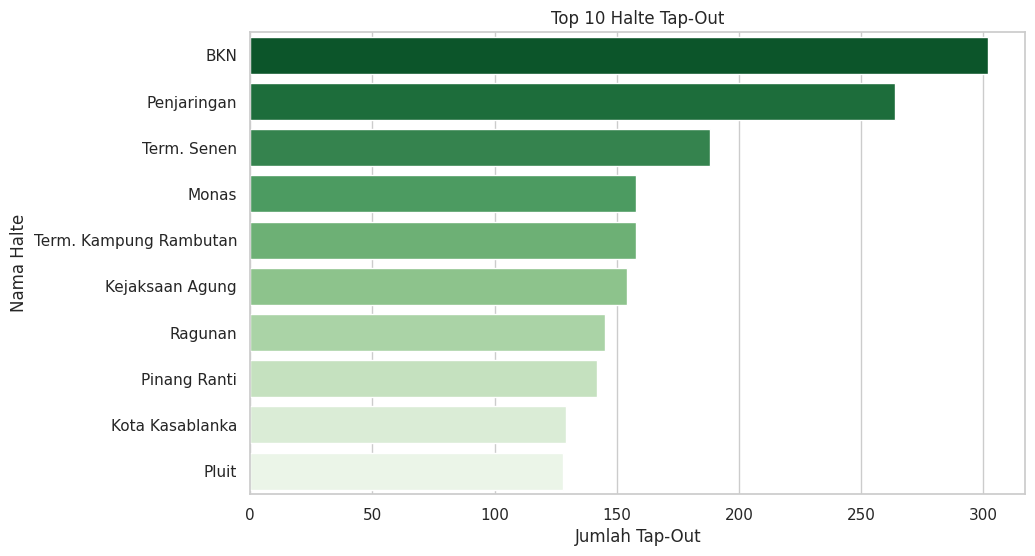

In [43]:
top_tapout = df['tapOutStopsName'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_tapout.values, y=top_tapout.index, palette="Greens_r")
plt.title("Top 10 Halte Tap-Out")
plt.xlabel("Jumlah Tap-Out")
plt.ylabel("Nama Halte")
plt.show()